In [9]:
import pandas as pd
import numpy as np


crime_df= pd.read_csv("C:/Users/Narsing/Downloads/Assigments data science/crime_data.csv")
crime_df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [11]:
from sklearn.preprocessing import StandardScaler
# Assume you have loaded your crime data into the crime_df DataFrame

crime_df.dropna(inplace=True)  # This removes rows with missing values. You can choose an appropriate strategy based on your data.

# Select only the numeric columns for standardization
numeric_columns = ['Murder', 'Assault', 'UrbanPop', 'Rape']
crime_numeric = crime_df[numeric_columns]

# Standardize the numeric data
scaler = StandardScaler()
crime_df_scaled = scaler.fit_transform(crime_numeric)

# K-Means Clustering

C:\Users\Narsing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Narsing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Narsing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Narsing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the e

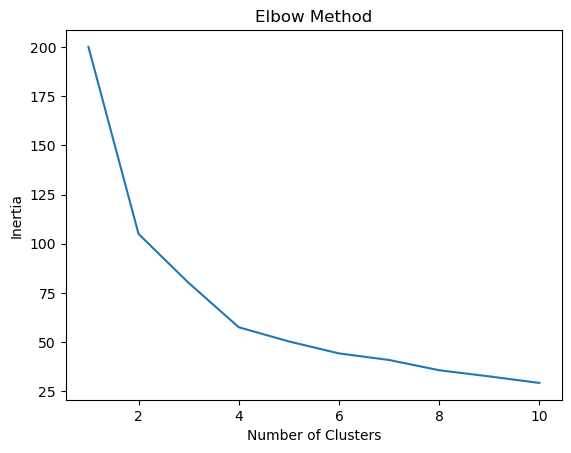

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(crime_df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(crime_df_scaled)

# Add the cluster labels to the original dataframe
crime_df['Cluster'] = kmeans_labels
print(crime_df.head())

C:\Users\Narsing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Narsing\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   Unnamed: 0  Murder  Assault  UrbanPop  Rape  Cluster
0     Alabama    13.2      236        58  21.2        1
1      Alaska    10.0      263        48  44.5        1
2     Arizona     8.1      294        80  31.0        1
3    Arkansas     8.8      190        50  19.5        2
4  California     9.0      276        91  40.6        1


# DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=10, min_samples=5)
dbscan_labels = dbscan.fit_predict(crime_df_scaled)

# Add the cluster labels to the original dataframe
crime_df['Cluster'] = dbscan_labels
print(crime_df.head())

   Unnamed: 0  Murder  Assault  UrbanPop  Rape  Cluster
0     Alabama    13.2      236        58  21.2        0
1      Alaska    10.0      263        48  44.5        0
2     Arizona     8.1      294        80  31.0        0
3    Arkansas     8.8      190        50  19.5        0
4  California     9.0      276        91  40.6        0


In [17]:
# Check the number of clusters formed and the number of outliers (cluster label -1)
num_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
num_outliers = list(dbscan_labels).count(-1)

print(f"Number of clusters: {num_clusters}")
print(f"Number of outliers: {num_outliers}")

# Examine the data points in each cluster
for cluster_id in set(dbscan_labels):
    if cluster_id != -1:
        cluster_data = crime_df[crime_df['Cluster'] == cluster_id]
        print(f"Cluster {cluster_id} has {len(cluster_data)} data points.")

Number of clusters: 1
Number of outliers: 0
Cluster 0 has 50 data points.
